<a href="https://colab.research.google.com/github/oskrplopez81/DCDP_2022/blob/main/Copy_of_estad%C3%ADstica_param%C3%A9trica_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="a"></a>
<h1><center>1 Intervalos de Confianza</center></h1>

![alt text](https://conceptosclaros.com/wp-content/uploads/2017/03/intervalo-confianza-normal-estandar-720x450.png)


* ## ¿Qué es una interavlo de confianza?

Un intervalo de confianza es una técnica de estimación utilizada en inferencia estadística que permite acotar un par o varios pares de valores, dentro de los cuales se encontrará la estimación puntual buscada (con una determinada probabilidad).

* ## El cálculo de un intervalo de confianza depende principalmente de los siguientes factores:

**Tamaño de la muestra seleccionada:** Dependiendo de la cantidad de datos que se hayan utilizado para calcular el valor muestral, este se acercará más o menos al verdadero parámetro poblacional.

**Nivel de confianza:** Nos va a informar en qué porcentaje de casos nuestra estimación acierta. Los niveles habituales son el 95% y el 99%.

**Margen de error de nuestra estimación:** Este se denomina como alfa y nos informa de la probabilidad que existe de que el valor poblacional esté fuera de nuestro intervalo.

**Lo estimado en la muestra (media, varianza, diferencia de medias…):** De esto va a depender el estadístico pivote para el cálculo del intervalo.

* ## Método de la Cantidad Pivotal

Para construir un IC para **θ** vamos a buscar una cantidad pivotal, es decir, una
función **C(X1, . . . , Xn, θ)** cuya distribución no depende de **θ**.

Una vez que la tengamos, los pasos serán:

**1.-** Obtener la distribución de la cantidad pivotal.

**2.-** Obtener C1 y C2 tales que P (C1 < C(X1, . . . , Xn, θ) < C2) = 1 − α.

**3.-** Despejar θ de las desigualdades C1 < C(X1, . . . , Xn, θ) < C2, hasta
obtener P (T1(X1, . . . , Xn) < θ < T2(X1, . . . , Xn)) = 1 − α.

**4.-** Para una muestra particular (x1, . . . , xn), el IC para θ ser´a
(T1(x1, . . . , xn), T2(x1, . . . , xn) )

  

Ejercicios

In [ ]:
import numpy as np
import random
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [ ]:
response=[]
df=pd.DataFrame(columns=["theta","stat1","stat2","i","rechazo"])
dic={}


parameters=[(i+5000)/20000 for i in range(1,10000)]
alpha=0.05
n=10000
z1=norm.ppf(1-(alpha/2))
z2=norm.ppf((alpha/2))
m=10000
h0=0.5
for i in range(0,n):
    theta=random.choice(parameters)
    record=[]       
    mean=np.mean(np.random.binomial(1,h0,m))
    # for x in parameters:
    x=theta
    stat1=x+z1*((x*(1-x))/m)**(1/2)
    stat2=x+z2*((x*(1-x))/m)**(1/2)
    if mean<stat1 and mean>stat2:
        dic["rechazo"]=1
    else:
        dic["rechazo"]=0
    dic["theta"]=x
    dic["stat1"]=stat1
    dic["stat2"]=stat2
    dic["i"]=i
    df=pd.concat([df,pd.DataFrame([dic])],ignore_index=True)
      
    

# 10,000 simulaciones con tamaño de muestra 10,000. Se escoge aleatoriamente valores de h0 y se deja el verdadero valor del parámetro fijo. Líneas verdes muestran intervalos de confianza en donde no se rechaza la hipótesis nula. Líneas rojas muestran intervalos de confianza en donde se rechaza la hipótesis nula.

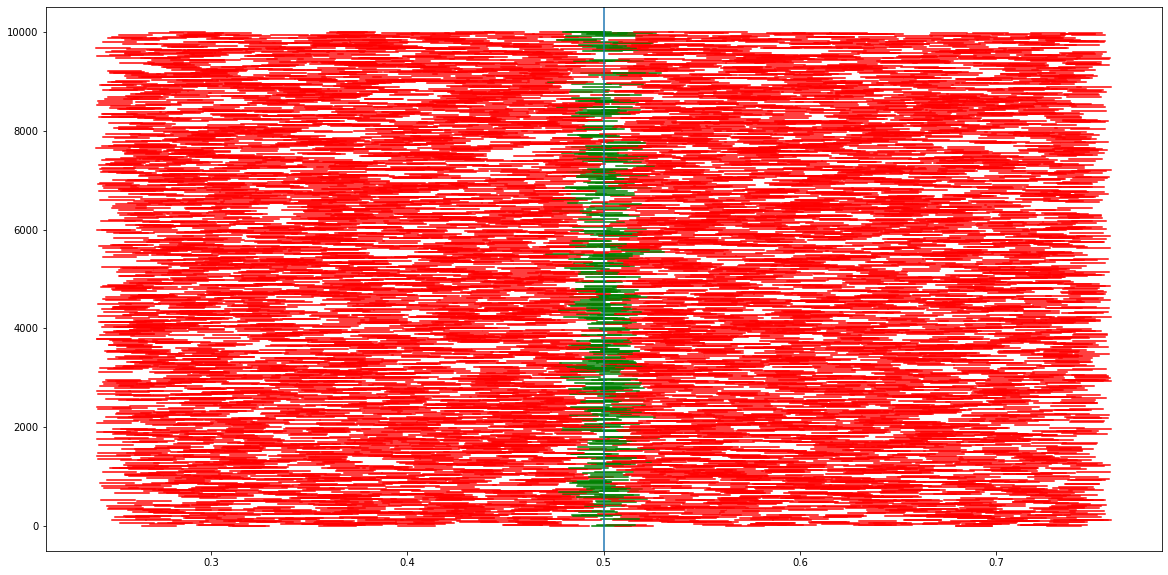

In [ ]:
plt.figure(figsize=(20,10)) 
for i in range(len(df)):
    if df["rechazo"][i]==1:
        plt.plot([df["stat1"][i],df["stat2"][i]] ,[df["i"][i],df["i"][i] ],c="g")
    else:
        plt.plot([df["stat1"][i],df["stat2"][i]] ,[df["i"][i],df["i"][i] ],c="r")
plt.axvline(0.5)



# 10,000 simulaciones con tamaño de muestra 10,000. Se escoge aleatoriamente valores de h0 y se deja el verdadero valor del parámetro fijo. Líneas verdes muestran intervalos de confianza en donde no se rechaza la hipótesis nula. Líneas rojas muestran intervalos de confianza en donde se rechaza la hipótesis nula. Se repite el experimento ordenando los intervalos de menor a mayor


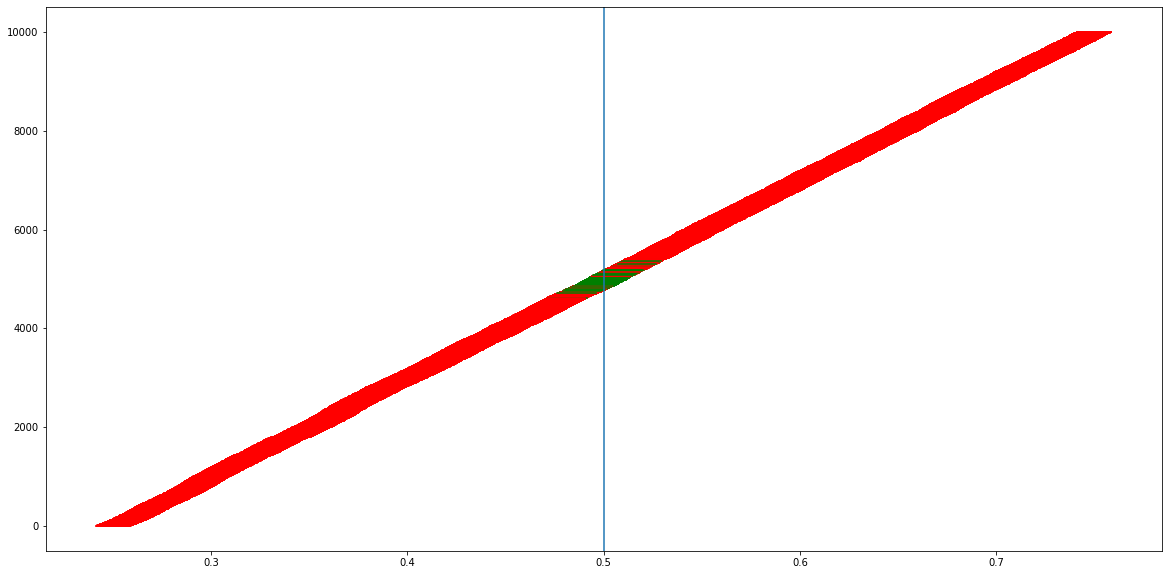

In [ ]:
plt.figure(figsize=(20,10)) 
for i in range(len(df)):
    if df["rechazo"][i]==1:
        plt.plot([df["stat1"][i],df["stat2"][i]] ,[df["i"][i],df["i"][i] ],c="g")
    else:
        plt.plot([df["stat1"][i],df["stat2"][i]] ,[df["i"][i],df["i"][i] ],c="r")
plt.axvline(0.5)
# Parametro fijo#

In [ ]:
response=[]
df=pd.DataFrame(columns=["theta","stat1","stat2","i","rechazo"])
dic={}


parameters=[1/4,1/2,1/3]
alpha=0.05
n=50
z1=norm.ppf(1-(alpha/2))
z2=norm.ppf((alpha/2))
m=1000

for i in range(0,n):
    theta=random.choice(parameters)
    record=[]
            
    mean=np.mean(np.random.binomial(1,theta,m))
    for x in parameters:
        stat1=x+z1*((x*(1-x))/m)**(1/2)
        stat2=x+z2*((x*(1-x))/m)**(1/2)
        if mean<stat1 and mean>stat2:
            dic["rechazo"]=1
        else:
            dic["rechazo"]=0
        dic["theta"]=x
        dic["stat1"]=stat1
        dic["stat2"]=stat2
        dic["i"]=i
        df=pd.concat([df,pd.DataFrame([dic])],ignore_index=True)
      

# 50 simulaciones con tamaño de muestra 10,000. Se escoge aleatoriamente el valor del parámetro de la lista theta=1/2,1/3,1/4 y se crea un intervalo de confianza para cada uno de los posibles valores.  Líneas verdes muestran intervalos de confianza en donde no se rechaza la hipótesis nula. Líneas rojas muestran intervalos de confianza en donde se rechaza la hipótesis nula. Se repite el experimento ordenando los intervalos de menor a mayor


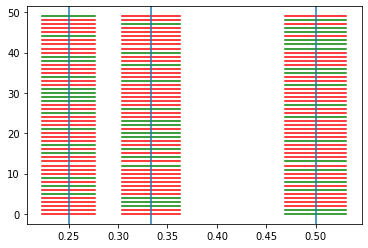

In [ ]:
for i in range(len(df)):
    if df["rechazo"][i]==1:
        plt.plot([df["stat1"][i],df["stat2"][i]] ,[df["i"][i],df["i"][i] ],c="g")
    else:
        plt.plot([df["stat1"][i],df["stat2"][i]] ,[df["i"][i],df["i"][i] ],c="r")

plt.axvline(parameters[0])
plt.axvline(parameters[1])
plt.axvline(parameters[2])     

#Parámetro variable 

<a id="a"></a>
<h1><center>2 Pruebas de hipótesis</center></h1>

![alt text](https://www.monografias.com/trabajos91/prueba-hipotesis-medias-excel-y-winstats/image002.png)

* ## ¿Qué es una prueba de hipótesis?

Las pruebas de hipótesis son utilizados para la toma de decisiones **estadísticas**, utilizando datos experimentales. En palabras burdas, es el pan de cada día de las estadísticas inferenciales y una habilidad crítica en el repertorio de un científico de datos.

* ## ¿Porqué usamos las pruebas de hipótesis?

La prueba de hipótesis es un procedimiento esencial en estadística. Una prueba de hipótesis evalúa dos afirmaciones mutuamente excluyentes sobre una **población** para determinar qué afirmación es mejor respaldada por los datos de la *muestra*. Cuando decimos que un hallazgo es estadísticamente significativo, es gracias a una prueba de hipótesis.

<font color=red> Las pruebas de hipótesis son una herramienta crítica en **estadística inferencial**, para determinar cuál podría ser el valor de un parámetro de **población**. A menudo sacamos esta conclusión basada en un análisis de datos de muestra....</font>

Con la cuestión de la toma de decisiones basada en datos:

   * empresariales, científicos, tecnológicos, sociales y políticos, etc... 
    
El concepto de prueba de hipótesis se ha convertido en algo sumamente importante para comprender y aplicar en el contexto adecuado.



* ## ¿Cuales son las bases de las hipótesis? 

   * ### Hipótesis Nula
   * ### Hipótesis Alterna 

La hipótesis nula es, en general, lo **aburrido** (esperado), es decir, supone que nada interesante sucede / sucedió.

La hipótesis alterna es una suposición que contrarresta a la nula.

---

Hipótesis nula (H0): - En la estadística inferencial, la hipótesis nula es una declaración general o suposición predeterminada de que no hay relación entre dos fenómenos medidos, o no hay asociación entre grupos

En otras palabras, es una suposición básica o basada en el dominio o el conocimiento del problema.

Ejemplo: la producción de una empresa es = 50 unidades / por día, etc.

---

Hipótesis alterna (H1): - Es la hipótesis contraria a la hipótesis nula. Por lo general, se considera que las observaciones son el resultado de un efecto real (con cierta cantidad de variación de probabilidad superpuesta)

Ejemplo: la producción de una empresa es ! = 50 unidades / por día, etc.

---
<font color="red">**Por lo tanto, el proceso de prueba de hipótesis consiste en formular preguntas sobre los datos en función de la información recopilada y probarlas utilizando métodos estadísticos.**</font>

<a id="b"></a>
<h1><center> 2.1 Definición de error Tipo I  y  error Tipo II</center></h1>

---

* Error tipo I: cuando rechazamos la hipótesis nula, aunque esa hipótesis era cierta. El error tipo I se denota por alfa. En las pruebas de hipótesis, la curva normal que muestra la región crítica se llama región alfa

* Errores de tipo II: cuando aceptamos la hipótesis nula pero es falsa. Los errores de tipo II se denotan por beta. En las pruebas de hipótesis, la curva normal que muestra la región de aceptación se llama región beta.

![alt text](https://dp8v87cz8a7qa.cloudfront.net/45396/5bd20d03240611540492547.png)

---

* Prueba de una cola: - Una prueba de una hipótesis estadística, donde la región de rechazo está en un solo lado de la distribución de muestreo.

Ejemplo: - una universidad tiene ≥ 4000 estudiantes o ciencia de datos ≤ 80%

* Prueba de dos colas: una prueba de dos colas es una prueba estadística en la que el área crítica de una distribución es de dos lados y prueba si una muestra es mayor o menor que un cierto rango de valores. Si la muestra que se prueba cae en cualquiera de las áreas críticas, se acepta la hipótesis alternativa en lugar de la hipótesis nula.

Ejemplo: una universidad! = 4000 estudiantes o ciencias de datos! = 80%

---

### ¿Cuál es el proceso?

Normalmente empezamos con un punto de vista simple y empezamos con al hipótesis nula y calculamos (computamos) algunos estadísticos con respecto a nuestras muestras, que se puediera sintetizar de la siguiente manera:

### $$\displaystyle\frac{Mejor Estimación − Estimación Hipotética}{Error Estandar Estimación}$$

Donde, la **mejor estimación** proviene de la muestra.. p.ej., la media o algun valor de tendencia central de algún subconjunto de datos de la muestra.

El **error estandar** representa la variabilidad en la estimación y depende de la varianza y del tamaño de la muestra.

A lo que nos lleva a la siguiente pregunta...

### "¿Cuál es la posibilidad de observar el estadístico de prueba, este extremo, para esta muestra (considerando su tamaño y una dinámica probabilística adecuada que la gobierna), puramente aleatoriamente conocida si la hipótesis nula fuera cierta? "


In [ ]:
dic_df={}
response={}

parameters=[(i)/500 for i in range(1,100)]
df_return=pd.DataFrame(columns=["theta","prob","m"])
alpha=0.05
h0=0.1
z=norm.ppf(1-(alpha))
n=10000
n_m=[20,50,100,200,500]

for m in n_m:
    stat=h0+z*((h0*(1-h0))/m)**(1/2)
    df = pd.DataFrame(columns=parameters)
    for i in range(n):
        record={}
        for x in parameters:
            mean=np.mean(np.random.binomial(1,x,m))
            if mean>=stat:
                record[x]=1
                
            else:
                record[x]=0
        df=pd.concat([df,pd.DataFrame([record])],ignore_index=True)
    for c in df.columns:
        dic_return={}
        dic_return["prob"]=sum(df[c])/n
        dic_return["theta"]=c
        dic_return["m"]=m
        df_return=pd.concat([df_return,pd.DataFrame([dic_return])],ignore_index=True)

Potencia de la prueba h0=0.1 contra h1>0.1. Esta prueba se realizó con tamaños de muestra igual a 20,50,100,200,500




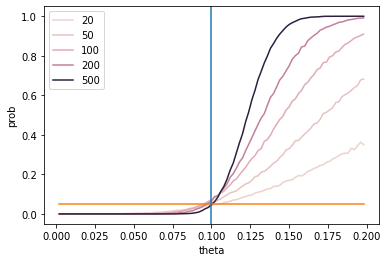

In [ ]:
seaborn.lineplot(data=df_return, x="theta", y='prob', hue='m')
seaborn.lineplot(x=parameters,y=[alpha for i in range(len(parameters))])
plt.axvline(h0)
plt.show()